In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing

In [2]:
# importamos el archivo de un equipo #Serie E162533
init_df = pd.read_excel("equipo-E162533_v2.xlsx")
init_df

,fecha,vel_motor,voltaje,mensaje_volt,horas_comp_trabajadas,temp_planta,Lamps,Lead Curtains,Radiation_mrh,problemas_rechazo,...,rep_filtro_aire,rep_tubo,rep_tarjeta_detector,rep_IOB,rep_otras_tarj,rep_motor,rep_software,rep_PILZ,rep_shutter,rep_cables
0,2017-06-01,20,222,0,7,29,1,2,0.02,0,...,0,0,0,0,0,0,1,0,0,0
1,2017-08-10,25,218,0,8,29,2,2,0.02,0,...,0,0,1,0,0,0,1,0,0,1
2,2017-12-01,24,215,0,7,26,2,2,0.02,0,...,0,0,0,0,0,0,1,0,0,0
3,2017-12-02,20,225,0,7,29,2,2,0.02,0,...,0,0,1,0,0,0,0,0,0,1
4,2018-04-03,24,220,1,8,27,2,2,0.02,0,...,0,0,0,0,0,0,1,0,0,0
5,2018-08-04,19,221,0,7,27,1,1,0.02,0,...,0,0,0,0,0,0,0,0,0,0
6,2018-09-04,18,215,0,8,29,2,2,0.02,0,...,0,0,0,1,1,0,1,0,1,1
7,2019-01-03,25,218,0,9,28,2,2,0.02,0,...,0,0,1,0,0,0,1,0,0,0
8,2019-02-04,19,240,1,7,32,2,2,0.08,1,...,1,1,1,1,0,0,1,1,0,1
9,2019-06-06,27,222,0,8,30,2,2,0.02,1,...,1,0,0,0,1,0,1,0,0,0


In [3]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  20 non-null     datetime64[ns]
 1   vel_motor              20 non-null     int64         
 2   voltaje                20 non-null     int64         
 3   mensaje_volt           20 non-null     int64         
 4   horas_comp_trabajadas  20 non-null     int64         
 5   temp_planta            20 non-null     int64         
 6   Lamps                  20 non-null     int64         
 7   Lead Curtains          20 non-null     int64         
 8   Radiation_mrh          20 non-null     float64       
 9   problemas_rechazo      20 non-null     int64         
 10  mantenimiento          20 non-null     int64         
 11  rep_filtro_aire        20 non-null     int64         
 12  rep_tubo               20 non-null     int64         
 13  rep_tar

In [4]:
cols = list(init_df.columns)
cols.remove("mantenimiento")
cols.remove("fecha")
cols

['vel_motor',
 'voltaje',
 'mensaje_volt',
 'horas_comp_trabajadas',
 'temp_planta',
 'Lamps',
 'Lead Curtains',
 'Radiation_mrh',
 'problemas_rechazo',
 'rep_filtro_aire',
 'rep_tubo',
 'rep_tarjeta_detector',
 'rep_IOB',
 'rep_otras_tarj',
 'rep_motor',
 'rep_software',
 'rep_PILZ',
 'rep_shutter',
 'rep_cables']

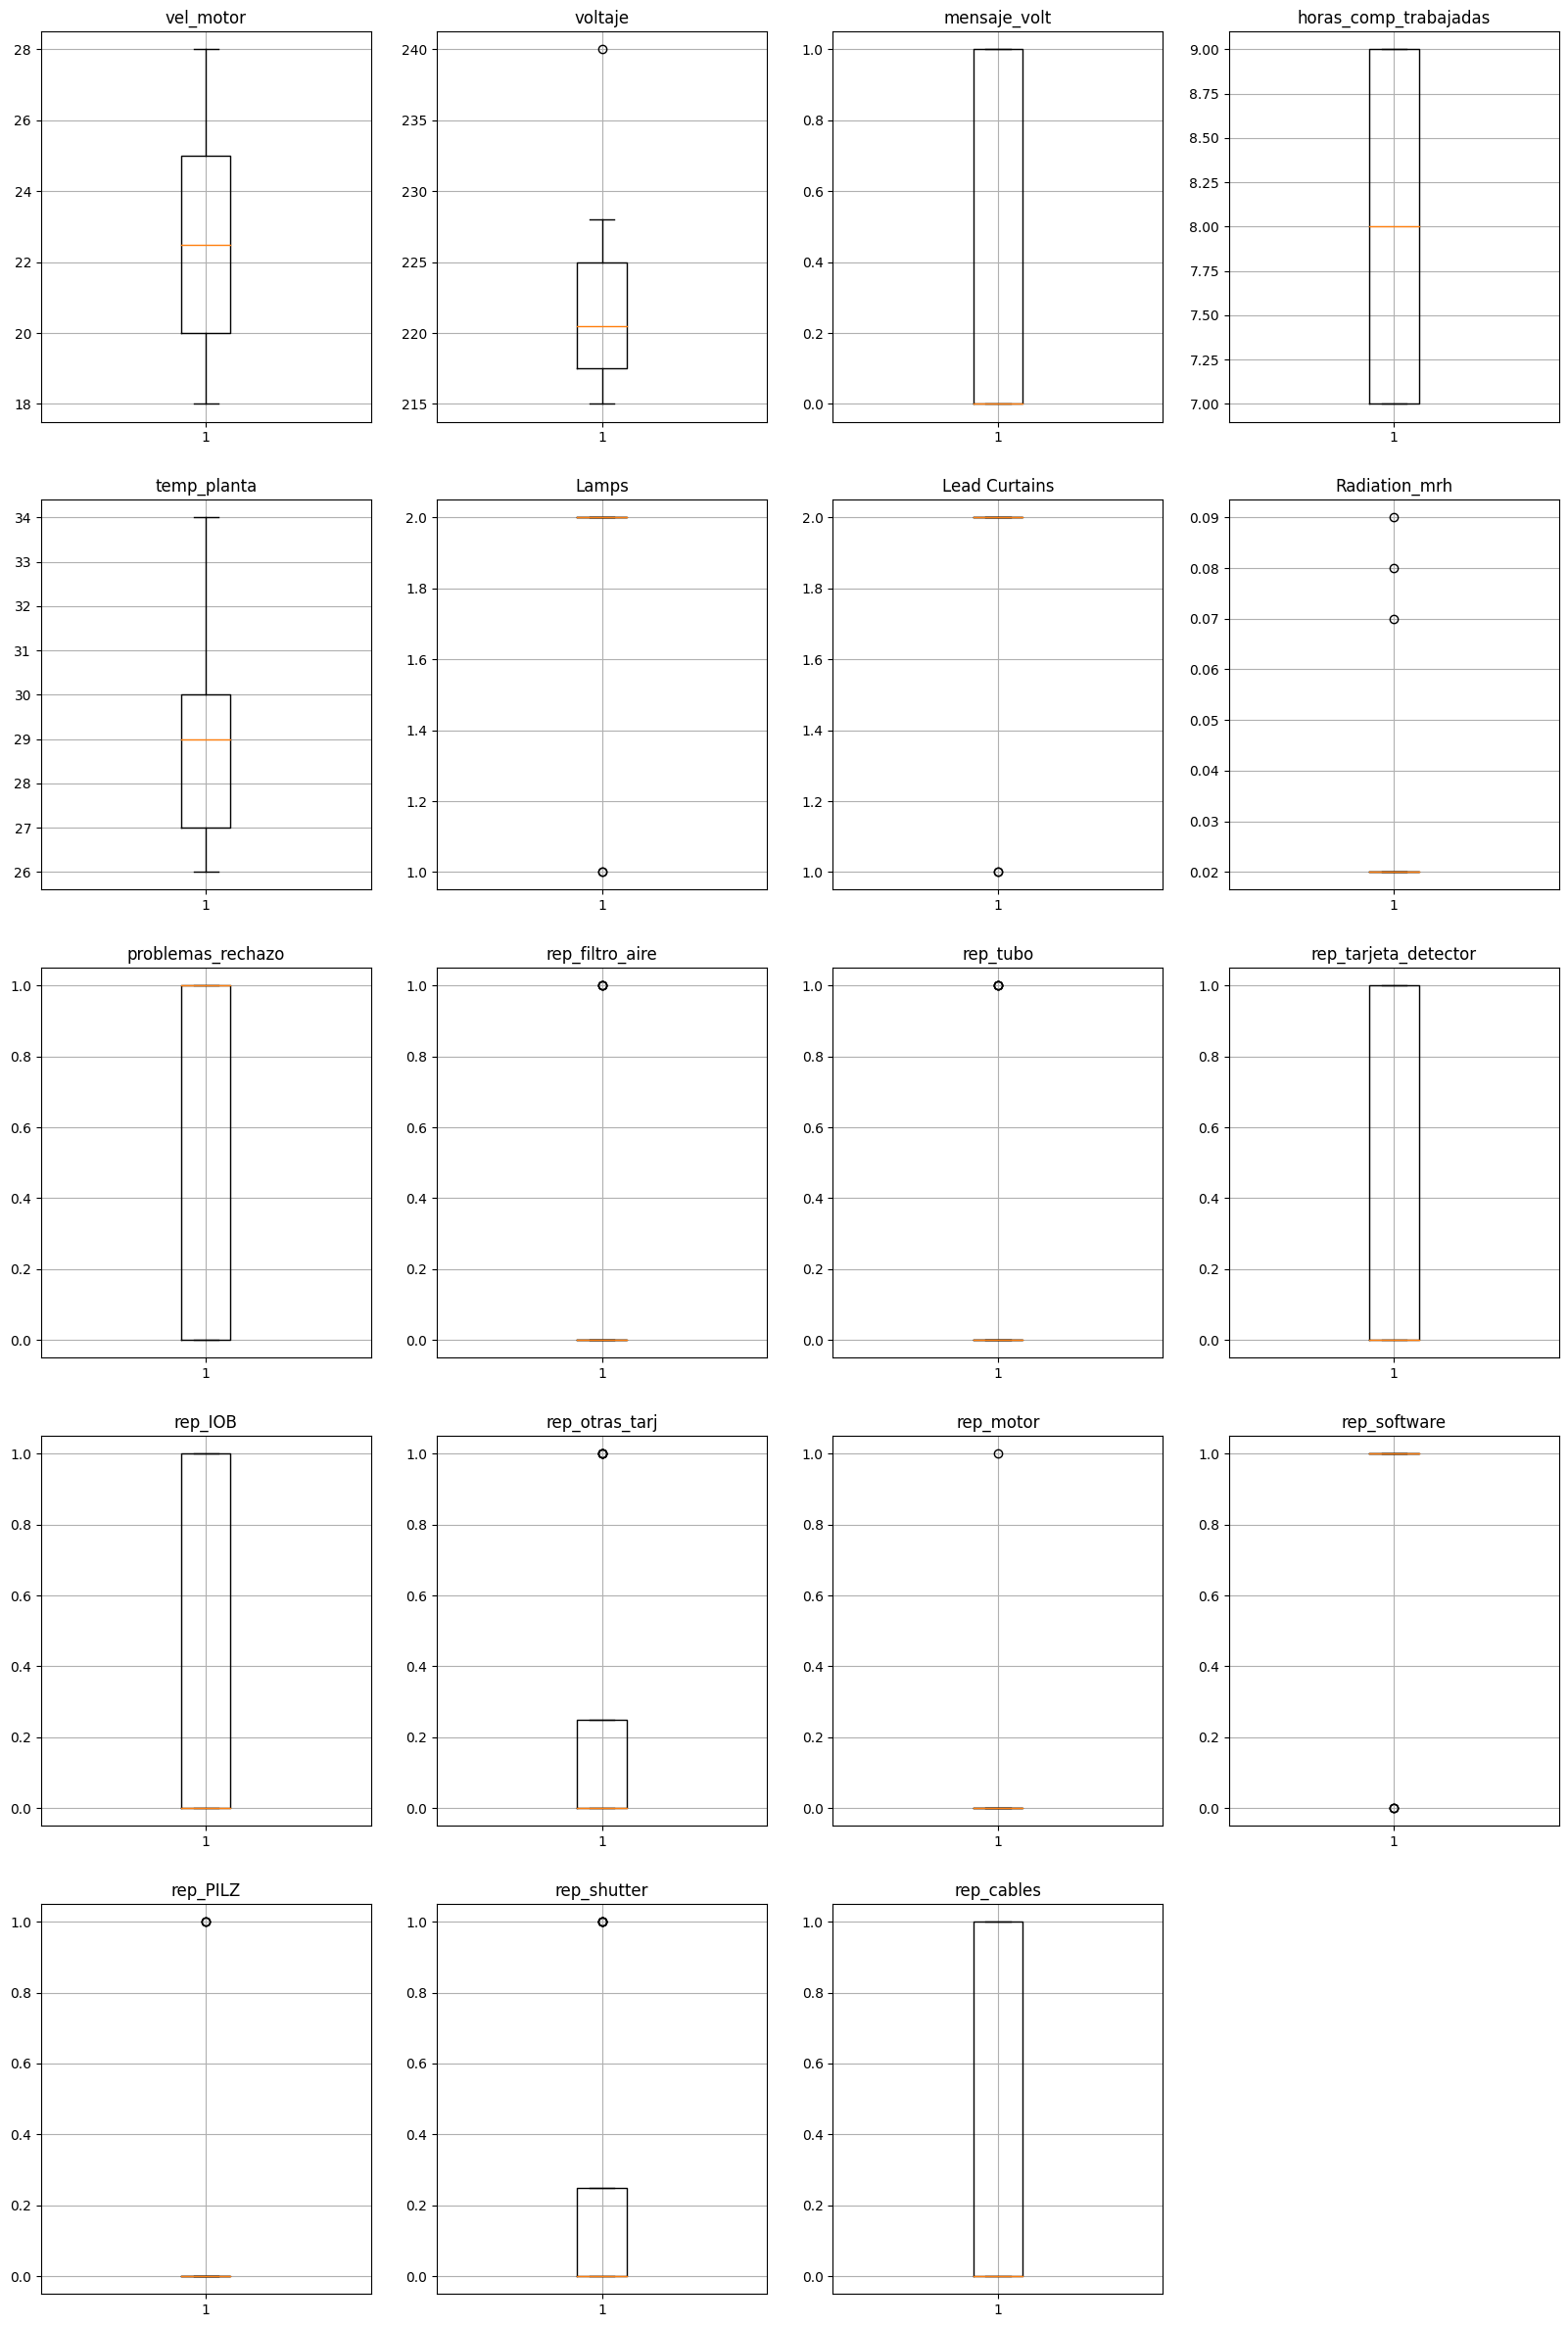

In [5]:
# sacamos los boxplots para ver si hay outliers
plt.figure(figsize=(20,30))
i = 1
for col in cols:
    plt.subplot(5,4,i)
    i += 1
    plt.boxplot(init_df[col])
    plt.title(col)
    plt.grid(True)
    
plt.show()
    

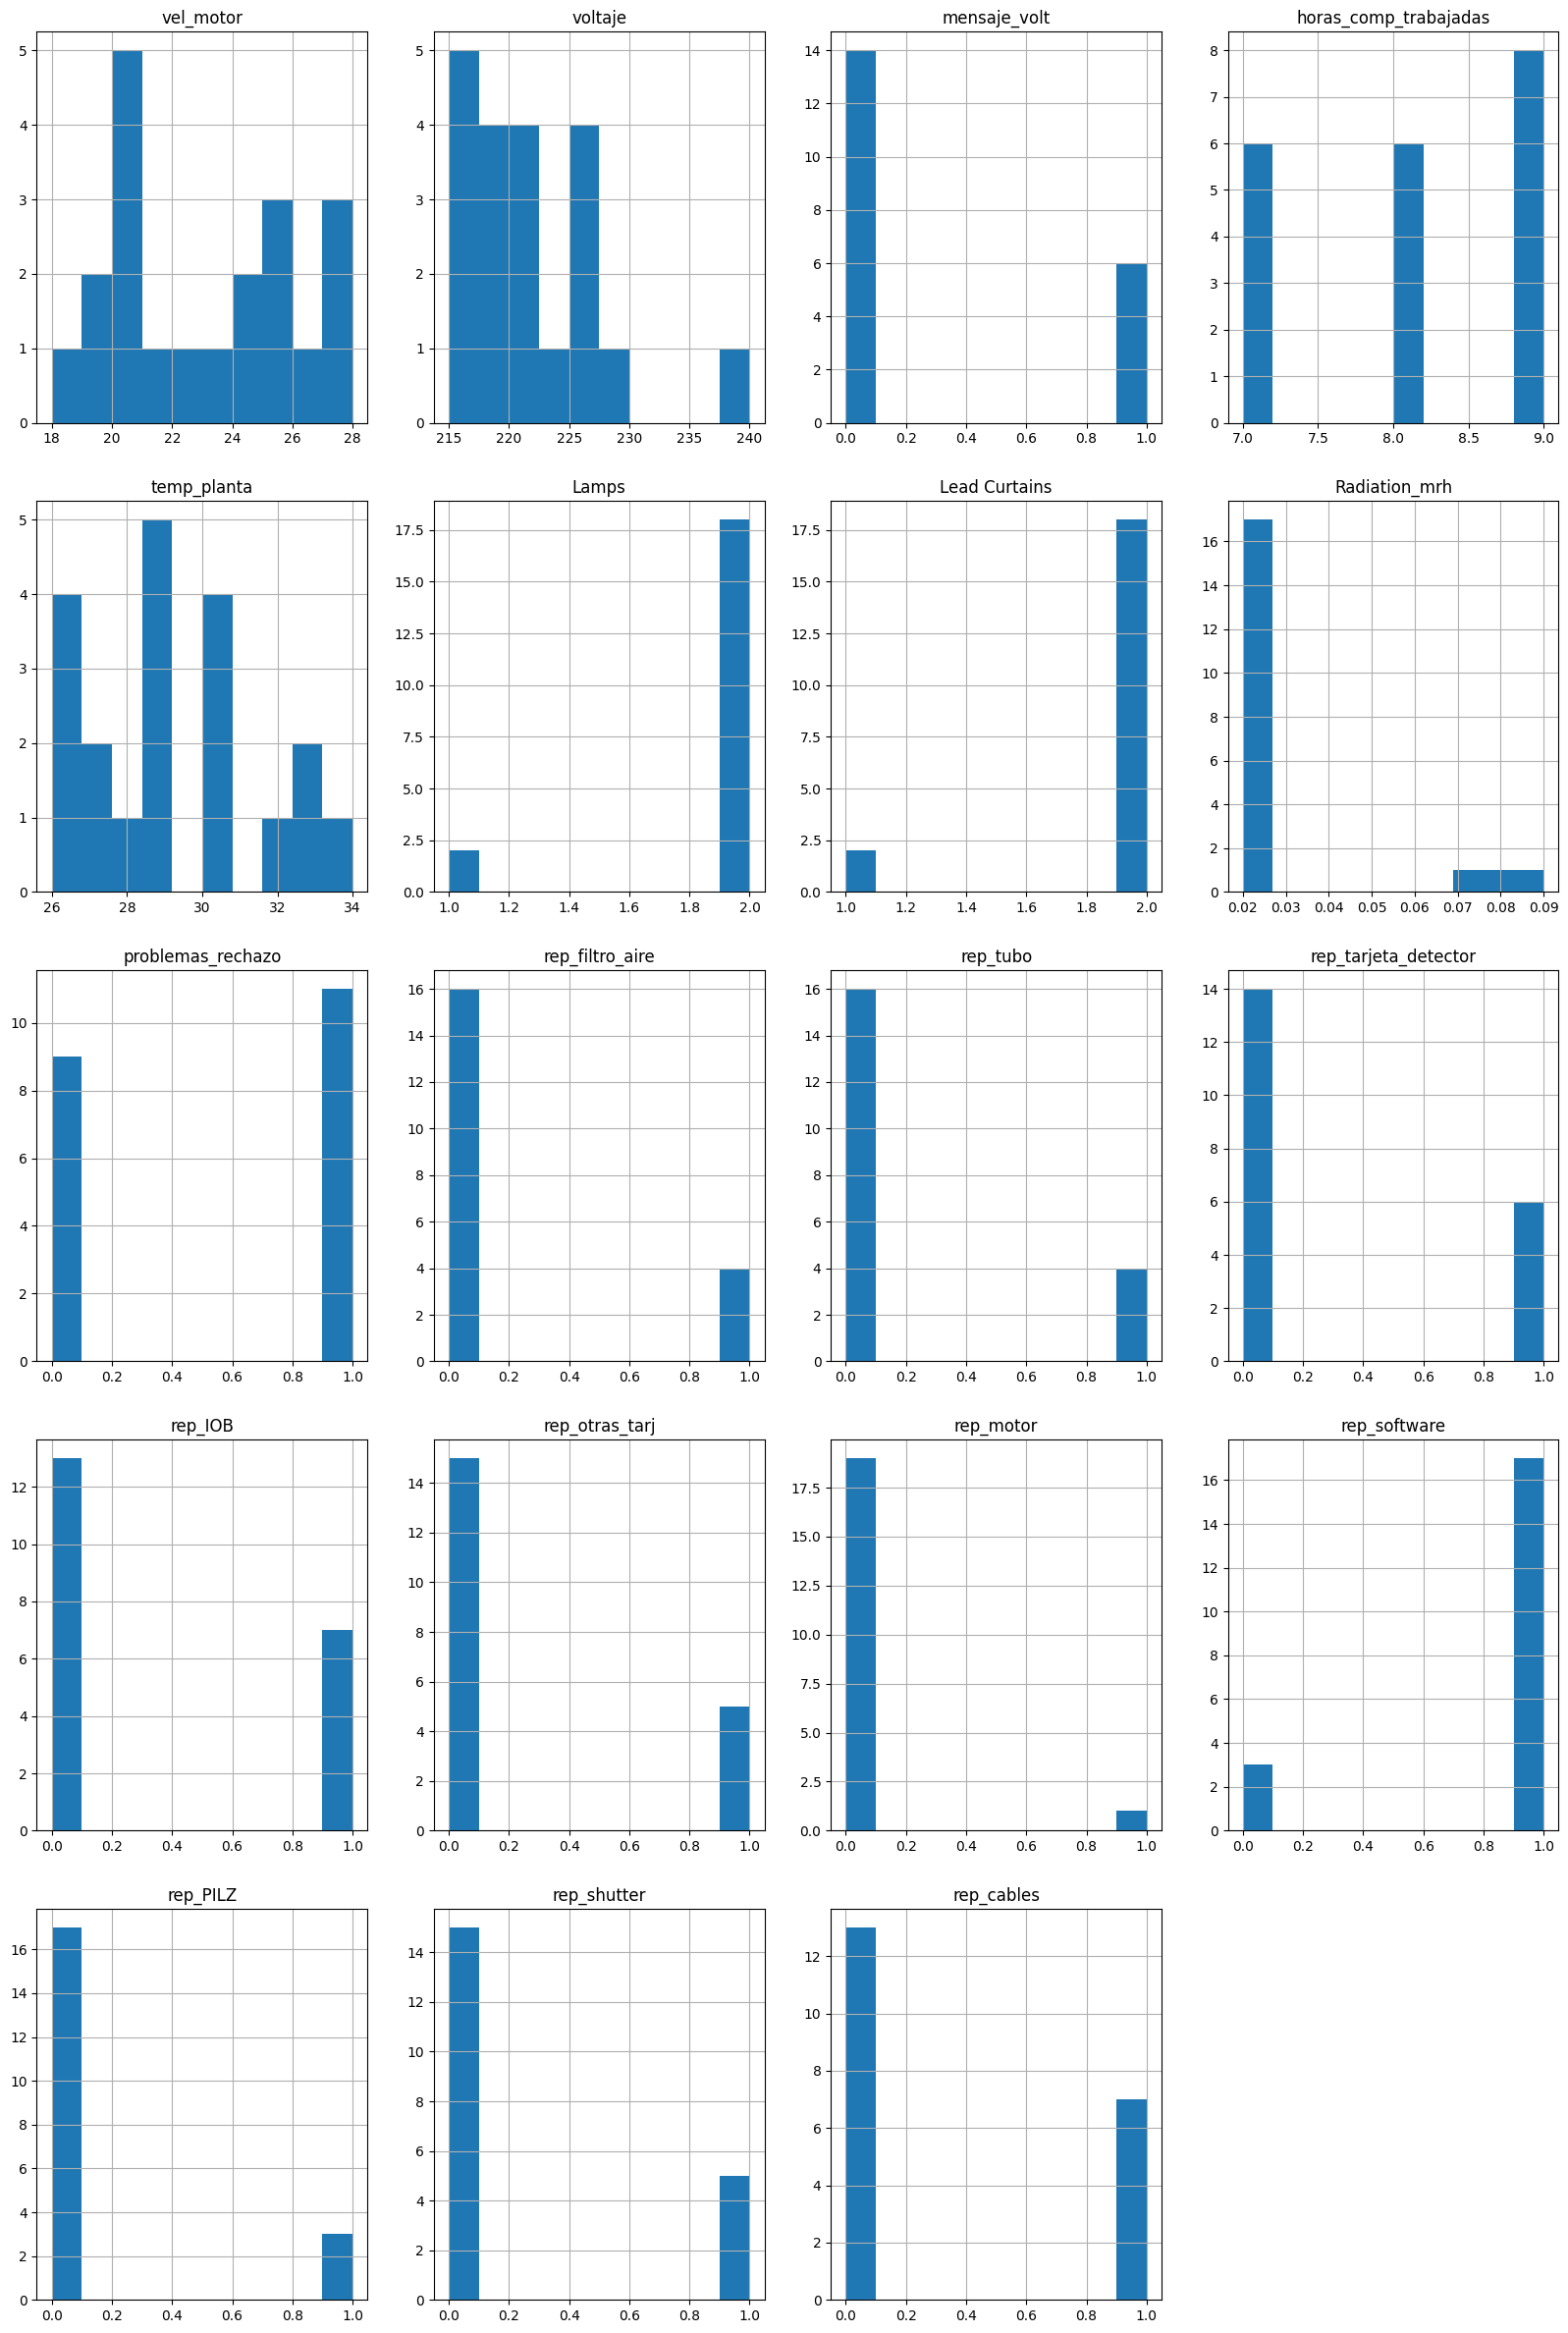

In [6]:
# sacamos los histogramas para ver qué valores hay
plt.figure(figsize=(20,30))
i = 1
for col in cols:
    plt.subplot(5,4,i)
    i += 1
    plt.hist(init_df[col])
    plt.title(col)
    plt.grid(True)
    
plt.show()

In [7]:
#normalizamos los valores
std_df = init_df.copy()[cols]
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(std_df)
std_df = mm_scaler.transform(std_df)
std_df

array([[0.2       , 0.28      , 0.        , 0.        , 0.375     ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.7       , 0.12      , 0.        , 0.5       , 0.375     ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.6       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.2       , 0.4       , 0.        , 0.        , 0.375     ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.   

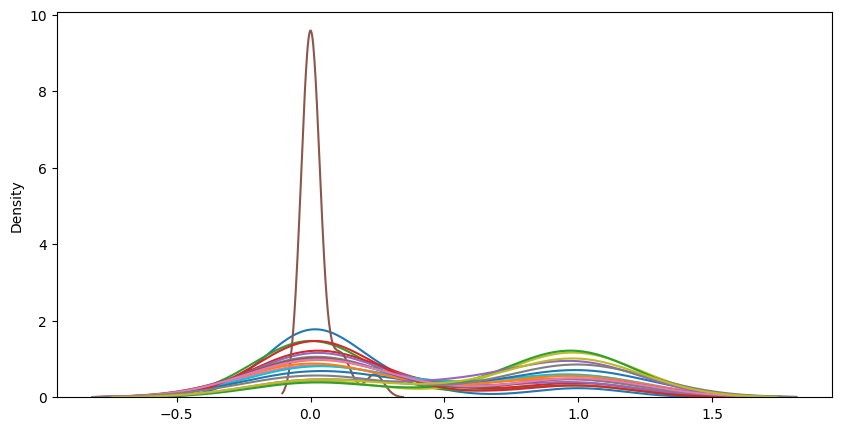

In [8]:
# sacamos las distribuciones de los datos
plt.figure(figsize=(10,5))
i = 1
for col in cols:
    #plt.subplot(5,4,i)
    sn.kdeplot(std_df[i-1])
    i += 1
    #plt.grid(True)
    
plt.show()

In [9]:
# dividimos datos de entrenamiento y prueba
X = init_df[cols]
y = init_df['mantenimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [12]:
# para conocer la importancia de cada variable generamos este clasificador Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [13]:
feature_imp = pd.Series(clf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

voltaje                  0.222495
rep_cables               0.132058
temp_planta              0.123136
vel_motor                0.109233
rep_tarjeta_detector     0.076132
rep_tubo                 0.037801
horas_comp_trabajadas    0.036961
rep_shutter              0.036950
Lead Curtains            0.035361
rep_IOB                  0.035012
problemas_rechazo        0.034480
mensaje_volt             0.026446
rep_filtro_aire          0.022133
Lamps                    0.018026
rep_otras_tarj           0.016022
Radiation_mrh            0.014531
rep_PILZ                 0.011677
rep_software             0.011013
rep_motor                0.000533
dtype: float64

In [15]:
type(feature_imp)

pandas.core.series.Series

In [17]:
feature_imp.head().to_dict()

{'voltaje': 0.2224945956770132,
 'rep_cables': 0.13205761680999778,
 'temp_planta': 0.12313585904835904,
 'vel_motor': 0.10923308552118077,
 'rep_tarjeta_detector': 0.07613150799817468}

In [22]:
y.name

'mantenimiento'

In [23]:
# no es interpretable
y_pred

array([1, 1, 1, 1], dtype=int64)

In [24]:
# no es interpretable
y_test

13    1
11    2
0     1
7     1
Name: mantenimiento, dtype: int64